In [2]:
  
 #This example uses Python 2.7 and the python-request library.
    #Increase the Data Rate Limit:  "jupyter notebook --NotebookApp.iopub_data_rate_limit=10000000"

from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '64f2516a-cdcc-4de7-8a10-b1e83edb39d8',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  #print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

In [4]:
type(data)

dict

In [6]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [8]:
df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now')
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11631,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.973752e+07,1.973752e+07,False,NaN,1,NaN,NaN,None,2024-08-09T10:27:00.000Z,60437.083574,4.358714e+10,9.6677,-0.919780,4.977760,-6.327392,3.185647,-12.857635,-0.678744,1.192878e+12,56.5161,1.269179e+12,None,2024-08-09T10:27:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-09 11:28:33.139670
1,1027,Ethereum,ETH,ethereum,9202,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.202632e+08,1.202632e+08,True,NaN,2,NaN,NaN,None,2024-08-09T10:26:00.000Z,2632.400696,2.299655e+10,-0.9224,-1.273405,8.065126,-16.431997,-14.894135,-28.316341,-9.454349,3.165809e+11,14.9603,3.165809e+11,None,2024-08-09T10:26:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-09 11:28:33.139670
2,825,Tether USDt,USDT,tether,93852,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,1.154047e+11,1.170681e+11,True,NaN,3,NaN,NaN,None,2024-08-09T10:26:00.000Z,1.000341,7.043640e+10,0.9090,0.014503,0.005621,0.119961,0.036127,0.039659,0.067551,1.154440e+11,5.4358,1.171080e+11,None,2024-08-09T10:26:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-08-09 11:28:33.139670
3,1839,BNB,BNB,bnb,2206,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,1.459367e+08,1.459367e+08,False,NaN,4,NaN,NaN,None,2024-08-09T10:26:00.000Z,503.937379,1.735552e+09,-3.4671,-0.921704,3.080758,-11.729815,-3.952895,-21.874369,-14.116991,7.354295e+10,3.4628,7.354295e+10,None,2024-08-09T10:26:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-09 11:28:33.139670
4,5426,Solana,SOL,solana,714,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,4.663386e+08,5.817957e+08,True,NaN,5,NaN,NaN,None,2024-08-09T10:26:00.000Z,156.169360,4.612387e+09,-12.7777,-1.309358,1.522969,-4.819402,8.822262,-2.271190,7.971656,7.282780e+10,3.4415,9.085867e+10,None,2024-08-09T10:26:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-09 11:28:33.139670
5,3408,USDC,USDC,usd-coin,21447,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,3.445187e+10,3.445187e+10,False,NaN,6,NaN,NaN,None,2024-08-09T10:26:00.000Z,1.000096,8.094246e+09,-4.8853,0.011972,0.007838,0.020048,0.013940,-0.016679,0.008972,3.445517e+10,1.6324,3.445517e+10,None,2024-08-09T10:26:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-08-09 11:28:33.139670
6,52,XRP,XRP,xrp,1363,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,5.610436e+10,9.998737e+10,False,NaN,7,NaN,NaN,None,2024-08-09T10:27:00.000Z,0.586901,2.698282e+09,-50.4460,-1.609578,-4.543390,2.114632,32.912920,18.456565,16.627810,3.292769e+10,1.5577,5.869007e+10,None,2024-08-09T10:27:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-09 11:28:33.139670
7,11419,Toncoin,TON,toncoin,499,2021-08-26T13:40:22.000Z,"[pos, layer-1, ftx-bankruptcy-estate, dwf-labs...",NaN,2.518346e+09,5.110221e+09,True,NaN,8,3.414167e+09,2.210884e+10,None,2024-08-09T10:26:00.000Z,6.475619,8.533865e+08,2.6318,-0.131809,5.972111,-1.719714,-11.675024,-8.458458,-3.182616,1.630785e+10,0.7726,3.309184e+10,None,2024-08-09T10:26:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-09 11:28:33.139670
8,74,Dogecoin,DOGE,dogecoin,1034,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me..

In [10]:
import pandas as pd
from time import sleep
import json
from requests import Session, ConnectionError, Timeout, TooManyRedirects

# Initialize an empty DataFrame to store all the data
df = pd.DataFrame()

def api_runner():
    global df  # Declare df as global so it can be updated within the function
    
    # Your existing code for API calls and processing data
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
        'start': '1',
        'limit': '15',
        'convert': 'USD'
    }
    headers = {
        'Accepts': 'application/json',
        'X-CMC_PRO_API_KEY': '64f2516a-cdcc-4de7-8a10-b1e83edb39d8',
    }

    session = Session()
    session.headers.update(headers)

    try:
        response = session.get(url, params=parameters)
        data = json.loads(response.text)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
        print(e)
        return  # Exit the function if there's an error

    # Assuming 'data' is your JSON response:
    df2 = pd.json_normalize(data['data'])
    df2['timestamp'] = pd.to_datetime('now')
    df = pd.concat([df, df2], ignore_index=True)

    if not os.path.isfile(r'C:\Users\10agn\OneDrive\Documents\Python Scripts\API.csv'):
        df.to_csv(r'C:\Users\10agn\OneDrive\Documents\Python Scripts\API.csv', header= column_names)
    else:
        df.to_csv(r'C:\Users\10agn\OneDrive\Documents\Python Scripts\API.csv', mode= 'a', header=False)

for i in range(333):
    api_runner()
    print('API Runner completed successfully')
    sleep(60)

API Runner completed successfully
API Runner completed successfully
API Runner completed successfully
API Runner completed successfully
API Runner completed successfully
API Runner completed successfully


KeyboardInterrupt: 

In [ ]:
df20 = pd.read_csv(r'C:\Users\10agn\OneDrive\Documents\Python Scripts\API.csv')
df20

In [14]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [22]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11631,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19737525.00000,19737525.00000,False,NaN,1,NaN,NaN,None,2024-08-09T10:27:00.000Z,60437.08357,43587139434.04211,9.66770,-0.91978,4.97776,-6.32739,3.18565,-12.85763,-0.67874,1192878447959.09521,56.51610,1269178755043.55005,None,2024-08-09T10:27:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-09 11:28:40.402557
1,1027,Ethereum,ETH,ethereum,9202,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120263205.46332,120263205.46332,True,NaN,2,NaN,NaN,None,2024-08-09T10:26:00.000Z,2632.40070,22996551441.93304,-0.92240,-1.27341,8.06513,-16.43200,-14.89413,-28.31634,-9.45435,316580945746.03760,14.96030,316580945746.03998,None,2024-08-09T10:26:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-09 11:28:40.402557
2,825,Tether USDt,USDT,tether,93852,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,115404652458.26874,117068077122.62410,True,NaN,3,NaN,NaN,None,2024-08-09T10:26:00.000Z,1.00034,70436400895.02254,0.90900,0.01450,0.00562,0.11996,0.03613,0.03966,0.06755,115444016056.04419,5.43580,117108008101.16000,None,2024-08-09T10:26:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-08-09 11:28:40.402557
3,1839,BNB,BNB,bnb,2206,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,145936690.19718,145936690.19718,False,NaN,4,NaN,NaN,None,2024-08-09T10:26:00.000Z,503.93738,1735552438.06059,-3.46710,-0.92170,3.08076,-11.72981,-3.95289,-21.87437,-14.11699,73542953196.01099,3.46280,73542953196.00999,None,2024-08-09T10:26:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-09 11:28:40.402557
4,5426,Solana,SOL,solana,714,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,466338618.33670,581795745.95608,True,NaN,5,NaN,NaN,None,2024-08-09T10:26:00.000Z,156.16936,4612386850.36042,-12.77770,-1.30936,1.52297,-4.81940,8.82226,-2.27119,7.97166,72827803488.26692,3.44150,90858669196.05000,None,2024-08-09T10:26:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-09 11:28:40.402557
5,3408,USDC,USDC,usd-coin,21447,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,34451865814.29645,34451865814.29645,False,NaN,6,NaN,NaN,None,2024-08-09T10:26:00.000Z,1.00010,8094246418.29791,-4.88530,0.01197,0.00784,0.02005,0.01394,-0.01668,0.00897,34455171463.83155,1.63240,34455171463.83000,None,2024-08-09T10:26:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-08-09 11:28:40.402557
6,52,XRP,XRP,xrp,1363,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00000,56104361423.00000,99987365591.00000,False,NaN,7,NaN,NaN,None,2024-08-09T10:27:00.000Z,0.58690,2698282192.59049,-50.44600,-1.60958,-4.54339,2.11463,32.91292,18.45656,16.62781,32927689773.01938,1.55770,58690071391.71000,None,2024-08-09T10:27:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-08-09 11:28:40.402557
7,11419,Toncoin,TON,toncoin,499,2021-08-26T13:40:22.000Z,"[pos, layer-1, ftx-bankruptcy-estate, dwf-labs...",NaN,2518346354.11617,5110221387.05400,True,NaN,8,3414166606.00000,22108840951.43325,None,2024-08-09T10:26:00.000Z,6.47562,853386496.54653,2.63180,-0.13181,5.97211,-1.71971,-11.67502,-8.45846,-3.18262,16307850620.39123,0.77260,33091844924.74000,None,2024-08-09

In [24]:
df3 = df.groupby('name', sort=False)[['quote.USD.percent_change_1h', 'quote.USD.percent_change_24h', 'quote.USD.percent_change_7d', 'quote.USD.percent_change_30d', 'quote.USD.percent_change_60d', 'quote.USD.percent_change_90d']].mean()
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,-0.62373,5.35284,-6.03817,3.44876,-12.62638,-0.36736
Ethereum,-1.29956,8.14122,-16.30021,-14.81596,-28.16594,-9.24194
Tether USDt,0.00661,0.01726,0.11825,0.05228,0.07169,0.08109
BNB,-0.68294,3.28084,-11.52818,-3.75834,-21.58810,-13.85221
Solana,-0.98653,1.69815,-4.53817,9.11899,-1.94405,8.32789
USDC,-0.00308,0.00905,0.00494,0.01414,0.00507,0.01398
XRP,-0.81726,-4.07846,2.62686,33.45470,18.62692,17.16938
Toncoin,0.10688,6.05276,-1.61976,-11.48953,-8.34107,-3.05835
Dogecoin,-0.77912,4.42548,-10.72434,-3.94212,-28.05103,-27.23237


In [26]:
df4 = df3.stack()
df4

name                                      
Bitcoin       quote.USD.percent_change_1h     -0.62373
              quote.USD.percent_change_24h     5.35284
              quote.USD.percent_change_7d     -6.03817
              quote.USD.percent_change_30d     3.44876
              quote.USD.percent_change_60d   -12.62638
              quote.USD.percent_change_90d    -0.36736
Ethereum      quote.USD.percent_change_1h     -1.29956
              quote.USD.percent_change_24h     8.14122
              quote.USD.percent_change_7d    -16.30021
              quote.USD.percent_change_30d   -14.81596
              quote.USD.percent_change_60d   -28.16594
              quote.USD.percent_change_90d    -9.24194
Tether USDt   quote.USD.percent_change_1h      0.00661
              quote.USD.percent_change_24h     0.01726
              quote.USD.percent_change_7d      0.11825
              quote.USD.percent_change_30d     0.05228
              quote.USD.percent_change_60d     0.07169
              quote.US

In [30]:
type(df4)

pandas.core.series.Series

In [32]:
df5 = df4.to_frame(name='values')
df5

values
name                                               
Bitcoin      quote.USD.percent_change_1h   -0.62373
             quote.USD.percent_change_24h   5.35284
             quote.USD.percent_change_7d   -6.03817
             quote.USD.percent_change_30d   3.44876
             quote.USD.percent_change_60d -12.62638
             quote.USD.percent_change_90d  -0.36736
Ethereum     quote.USD.percent_change_1h   -1.29956
             quote.USD.percent_change_24h   8.14122
             quote.USD.percent_change_7d  -16.30021
             quote.USD.percent_change_30d -14.81596
             quote.USD.percent_change_60d -28.16594
             quote.USD.percent_change_90d  -9.24194
Tether USDt  quote.USD.percent_change_1h    0.00661
             quote.USD.percent_change_24h   0.01726
             quote.USD.percent_change_7d    0.11825
             quote.USD.percent_change_30d   0.05228
             quote.USD.percent_change_60d   0.07169
             quote.USD.percent_change_90d   0.08109
BNB          quote.USD.percent_change_1h   -0.68294
             quote.USD.percent_change_24h   3.28084
             quote.USD.percent_change_7d  -11.52818
             quote.USD.percent_change_30d  -3.75834
             quote.USD.percent_change_60d -21.58810
             quote.USD.percent_change_90d -13.85221
Solana       quote.USD.percent_change_1h   -0.98653
             quote.USD.percent_change_24h   1.69815
             quote.USD.percent_change_7d   -4.53817
             quote.USD.percent_change_30d   9.11899
             quote.USD.percent_change_60d  -1.94405
             quote.USD.percent_change_90d   8.32789
USDC         quote.USD.percent_change_1h   -0.00308
             quote.USD.percent_change_24h   0.00905
             quote.USD.percent_change_7d    0.00494
             quote.USD.percent_change_30d   0.01414
             quote.USD.percent_change_60d   0.00507
             quote.USD.percent_change_90d   0.01398
XRP          quote.USD.percent_change_1h   -0.81726
             quote.USD.percent_change_24h  -4.07846
             quote.USD.percent_change_7d    2.62686
             quote.USD.percent_change_30d  33.45470
             quote.USD.percent_change_60d  18.62692
             quote.USD.percent_change_90d  17.16938
Toncoin      quote.USD.percent_change_1h    0.10688
             quote.USD.percent_change_24h   6.05276
             quote.USD.percent_change_7d   -1.61976
             quote.USD.percent_change_30d -11.48953
             quote.USD.percent_change_60d  -8.34107
             quote.USD.percent_change_90d  -3.05835
Dogecoin     quote.USD.percent_change_1h   -0.77912
             quote.USD.percent_change_24h   4.42548
             quote.USD.percent_change_7d  -10.72434
             quote.USD.percent_change_30d  -3.94212
             quote.USD.percent_change_60d -28.05103
             quote.USD.percent_change_90d -27.23237
Cardano      quote.USD.percent_change_1h   -0.96632
             quote.USD.percent_change_24h   2.65768
             quote.USD.percent_change_7d  -10.73802
             quote.USD.percent_change_30d -10.85581
             quote.USD.percent_change_60d -23.66720
             quote.USD.percent_change_90d -22.90173
TRON         quote.USD.percent_change_1h   -0.21174
             quote.USD.percent_change_24h   0.71574
             quote.USD.percent_change_7d   -0.23601
             quote.USD.percent_change_30d  -2.54542
             quote.USD.percent_change_60d   9.02777
             quote.USD.percent_change_90d  -0.03059
Avalanche    quote.USD.percent_change_1h   -0.83740
             quote.USD.percent_change_24h   5.11469
             quote.USD.percent_change_7d  -13.42372
             quote.USD.percent_change_30d -19.46419
             quote.USD.percent_change_60d -33.93159
             quote.USD.percent_change_90d -35.31247
Shiba Inu    quote.USD.percent_change_1h   -1.28662
             quote.USD.percent_change_24h   4.72228
             quote.USD.percent_change_7d   -9.91773
             quote.USD.percent_change_30d

In [44]:
index = pd.Index(range(90))
df6 = df5.reset_index()
df6

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,-0.62373
1,Bitcoin,quote.USD.percent_change_24h,5.35284
2,Bitcoin,quote.USD.percent_change_7d,-6.03817
3,Bitcoin,quote.USD.percent_change_30d,3.44876
4,Bitcoin,quote.USD.percent_change_60d,-12.62638
5,Bitcoin,quote.USD.percent_change_90d,-0.36736
6,Ethereum,quote.USD.percent_change_1h,-1.29956
7,Ethereum,quote.USD.percent_change_24h,8.14122
8,Ethereum,quote.USD.percent_change_7d,-16.30021
9,Ethereum,quote.USD.percent_change_30d,-14.81596


In [46]:
df7 = df6.rename(columns={'level_1': 'percent_change'})
df7

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,-0.62373
1,Bitcoin,quote.USD.percent_change_24h,5.35284
2,Bitcoin,quote.USD.percent_change_7d,-6.03817
3,Bitcoin,quote.USD.percent_change_30d,3.44876
4,Bitcoin,quote.USD.percent_change_60d,-12.62638
5,Bitcoin,quote.USD.percent_change_90d,-0.36736
6,Ethereum,quote.USD.percent_change_1h,-1.29956
7,Ethereum,quote.USD.percent_change_24h,8.14122
8,Ethereum,quote.USD.percent_change_7d,-16.30021
9,Ethereum,quote.USD.percent_change_30d,-14.81596


In [60]:
df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['1h', '24h', '7d', '30d', '60d', '90d'])
df7

,name,percent_change,values
0,Bitcoin,1h,-0.62373
1,Bitcoin,24h,5.35284
2,Bitcoin,7d,-6.03817
3,Bitcoin,30d,3.44876
4,Bitcoin,60d,-12.62638
5,Bitcoin,90d,-0.36736
6,Ethereum,1h,-1.29956
7,Ethereum,24h,8.14122
8,Ethereum,7d,-16.30021
9,Ethereum,30d,-14.81596


In [62]:
import seaborn as sns
import matplotlib.pyplot as plt

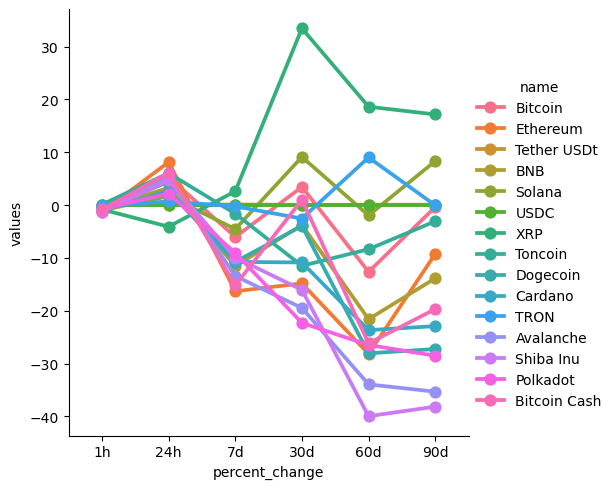

In [64]:
sns. catplot(x='percent_change', y='values', hue='name', data=df7, kind='point')

In [82]:
df9 = df[['name','quote.USD.price','timestamp']]
df9 = df9.query("name=='Ethereum'")
df9

,name,quote.USD.price,timestamp
1,Ethereum,2632.40070,2024-08-09 11:28:40.402557
16,Ethereum,2636.38582,2024-08-09 11:29:41.427708
31,Ethereum,2637.56212,2024-08-09 11:30:42.602288
46,Ethereum,2641.01248,2024-08-09 11:31:43.758917
61,Ethereum,2642.14614,2024-08-09 11:32:44.723688
76,Ethereum,2633.54740,2024-08-09 11:33:45.725498


<Axes: xlabel='timestamp', ylabel='quote.USD.price'>

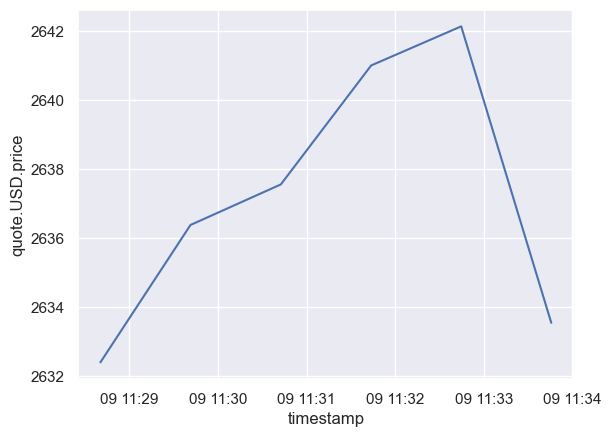

In [86]:
sns.set_theme(style="darkgrid")
sns.lineplot(x='timestamp', y='quote.USD.price', data=df9)